### Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Data Creation
- we sample two sets of data as:
- First we draw $500$ data points from a Multivariate Normal distribution with $\mu= $$[\begin{matrix} 0 & 0 \end{matrix}$$ ]$ which is a vector and covariance matrix
$H =
$$
\left [
\begin{matrix}
1 & 0  \\
0 & 1 \\
\end{matrix}
\right ] \tag{3-3}
$$.
$
- Then we draw $100$ data points from a Multivariate Normal distribution with a different $\mu= $$[\begin{matrix} 5 & 6 \end{matrix}$$ ]$ and same covariance matrix
$H =
$$
\left [
\begin{matrix}
1 & 0  \\
0 & 1 \\
\end{matrix}
\right ] \tag{3-3}
$$.
$
- We then concatenate the $500$ and $100$ data points together to obtain a dataset.
- After that we visualize the the data distribution of the constructed $2$-dimensional dataset.


In [38]:
def f(num_samples,mu,H):
    data = np.random.multivariate_normal(mu,H,num_samples)
    return data

In [40]:
data=np.concatenate([f(500,np.array([0,0]),np.array([[1,0],[0,1]])),f(100,np.array([5,6]),np.array([[1,0],[0,1]]))])

In [42]:
data.shape

(600, 2)

In [44]:
data[:500,0].shape

(500,)

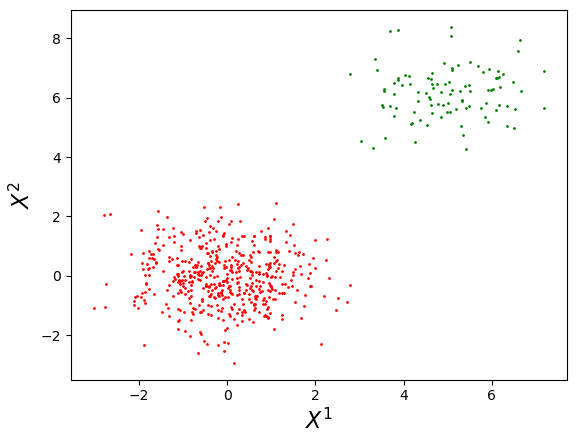

In [46]:
#plt.scatter(data[:,0],data[:,1],s=1,color='red[data[:,0]]')
plt.scatter(data[500:,0],data[500:,1],s=1,color='green')
plt.scatter(data[:500,0],data[:500,1],s=1,color ='red')
plt.xlabel('$X^1$', fontsize=16)
plt.ylabel('$X^2$', fontsize=16)
plt.show()

- Here we create a mesh-grid with dimension of $100\times 100$.
- we extend the mesh-grid range by finding a max and min of first colunm and second colunm to add a padding to the mesh-grid

In [49]:
x1_max=np.max(data[:,0])+1
x1_min=np.min(data[:,0])-1

x2_max=np.max(data[:,1])+1
x2_min=np.min(data[:,1])-1

In [51]:
resolution=100
x1_range = np.linspace(start=x1_min, 
                           stop=x1_max, num=resolution)
x2_range = np.linspace(start=x2_min, 
                           stop=x2_max, num=resolution)

In [53]:
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

In [55]:
X1_grid.shape

(100, 100)

In [57]:
X2_grid.shape

(100, 100)

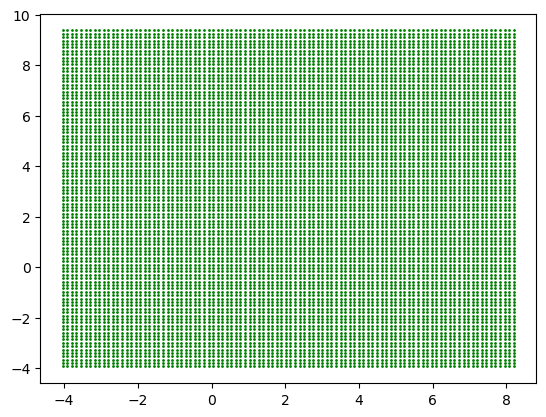

In [59]:
plt.scatter(X1_grid,X2_grid,s=1,color='green')

### Kernel Density Function
At this point we designed our kernel function. We used $2$-dimensional Gaussian Kernel function which is expressed mathematically as: 
$$
K(x) = {2\pi}^{-\frac{d}{2}} {det(H)}^{-\frac{1}{2}} e^{-\frac{1}{2} {x^T} {H^{-1}}x}
$$
where $d = 2$ in $2$-dimensional case. We calculate the Kernel density at some point x using the formula:
$$
f(x) = {\frac{1}{n}}{\sum_{i=1}^{n}K(x-x_{i})}
$$
Where $x_{i}$ is the $i$-th data point which is used to calculate the density at point $x$. Note that in the $2$-dimensional case $x$ and $x_i$ are both vectors of dimension $2$. For designing the kernel function $K(x)$, we used the 2-dimensional Identitiy matrix as the covariance matrix for the multinomial Gaussian Kernel. After this we calculate the density $f(x)$ with dimension for all the grid points in the constructed $ 100\times100$ grid.

In [93]:
def k(x,H,d=2):
    H_inv=np.linalg.inv(H)
    xt=np.matrix.transpose(x)
    y_1=np.matmul(xt,H_inv)
    y=np.matmul(y_1,x)
    exponent=np.exp(-0.5*y)
    t_1=1/np.sqrt(np.linalg.det(H))
    t_2=(2*np.pi)**(-d/2)
    t=t_1*t_2*exponent
    return t

In [63]:
def density_gen_2d(X1_grid,X2_grid,data):
    density_list=[]
    for r in range(len(X1_grid[0])):
        for c in range (len(X1_grid[1])):
            s=0
            for i in range(len(data)):
                xi=data[i]
                dif=np.array([X1_grid[r][c],X2_grid[r][c]])-xi 
                s=s+k(dif,np.array([[1, 0],[0, 1]]))
            density_list.append(s/len(data))
    return np.reshape(np.array(density_list), X1_grid.shape)

In [65]:
density_list_2D=density_gen_2d(X1_grid,X2_grid,data)

In [66]:
density_list_2D.shape

(100, 100)

Text(0.5, 1.0, 'Kernel_density 2D')

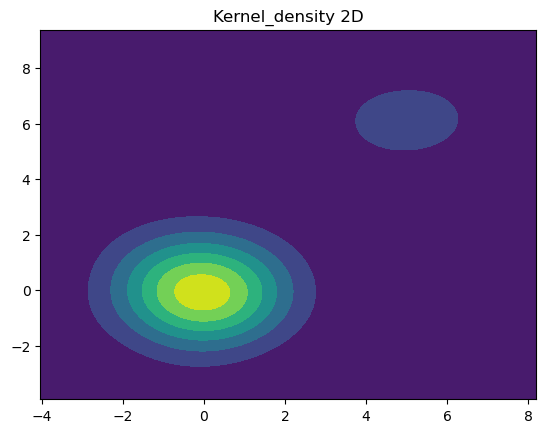

In [67]:
fig, ax = plt.subplots()
CS = ax.contourf(X1_grid, X2_grid, density_list_2D)
#ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Kernel_density 2D')

### Class-wise Density Calculation
Recall that we created our dataset such that $500$ points were drawn from one Gaussian distribution and $100$ points were drawn from another Gaussian distribution. So, we can treat our data as a imbalanced binary class data with the majority class having $500$ points and the minority class having $100$ data points. 
We then calculate the densities at $100\times 100$ meshgrid points with respect to the $500$ majority class data points and the $100$ minority class data points separately. So this gives us two seperate density values for each of the $100\times 100$ mesh grid points. After that we add the both densities by multipyling $0.5$ which gives us aggregate probability density as $1$. Then finally we visualize the densities at the mesh grid points with the help of contourplots.

In [151]:
density_list_2D_1=density_gen_2d(X1_grid,X2_grid,data[:500])

In [69]:
density_list_2D_2=density_gen_2d(X1_grid,X2_grid,data[500:])

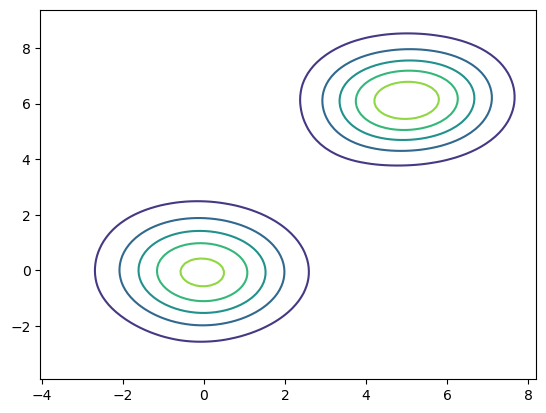

In [70]:
#fig, ax = plt.subplots()
CS_1 = plt.contour(X1_grid, X2_grid,  density_list_2D_1)
CS_2 = plt.contour(X1_grid, X2_grid,  density_list_2D_2)
#ax.clabel(CS, inline=True, fontsize=10)plt.set_title('Kernel_density 2D')

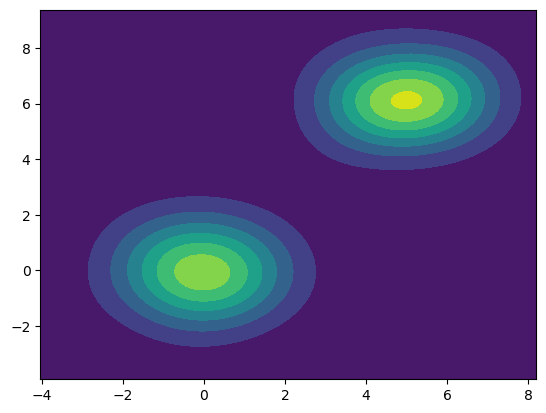

In [71]:
CS_1 = plt.contourf(X1_grid, X2_grid, .5* density_list_2D_1+ .5*density_list_2D_2)